In [ ]:
# PROJECT OBJECTIVE
#
# Statistical Analysis of Business Data - Trellis Insurance Company
# Explore the dataset and extract insights from the data
# Key Questions To Answer :
# 1. Explore the dataset and extract insights using EDA.
# 2. Prove (disprove) with Statistical Evidence that the BMI of Females is different from that of Males.
# 3. Is the proportion of smokers significantly different across different regions ?
# Hint : Create a contingency table/cross table using the function : stats.chi2_contingency()
# 4. Is the MEAN BMI of Women with no children, once child and two children the same ?
# Explain your answer with statistical analysis.
#
# ASSUMPTIONS
# The Health Insurance Customer's data is a simple random sample from the population data.
#
# TRELLISINSURANCE.CSV - About Data
# 1. Age - This is an integer indicating the age of beneficiary 
# (excluding those who are above 64 considering they are covered by Government) 
# 2. Sex - This is Policy holder's gender, male or female
# 3. BMI - This is the Body Mass Index which porvides a sense of how over or under weight a person is relative to their height.
# BMI is equal to weight (kilogram) divided by height (sq meter) squared. An ideal BMI is within range of 18.5 to 24.9.
# 4. Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
# 5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
# 6. Region - This is the beneficiary's place of residence in the U.S. divided into four geographic regions like 
# Northest, Southest, Southwest, Northwest.
# 7. Charges - Individual Medical cost billed by health insurance

In [ ]:
# EDA - Step By Step Approach
# 1. Importing Libraries and Data
# 2. Variable Identification
# 3. Univariate Analysis
# 4. Bivariate Analysis
# 5. Variable Transformation / Feature Creation

In [4]:
# Importing Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import Statistics Modeling
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.filterwarnings("ignore")
#
# Setting up the directory folder to call/invoke data file "TRELLISINSURANCE.csv"
#
import os
os.chdir("C:/Users/njoshi3/Documents/Data Science/NSArrows/")
#
# If importing data from Google Drive, Use below code
###
# from google.colab import drive
# drive.mount('/gdrive')
# %cd / gdrive/My Drive/Folder1/Folder2/
#
###
# Setting Default Seaborn Style for Plots
sns.set()
#
# Read Data File
data=pd.read_csv("TrellisInsurance.csv")

In [5]:
#Copying the data in another to avoid changes to the main data
#
trellisdata = data.copy()

In [6]:
# Know the shape of "trellisdata"
trellisdata.shape

(1338, 7)

In [7]:
#looking at the .head() and .tail() to derive some understanding observation at high level
#
pd.set_option("display.max_columns",None)        # To display values of all columns rather than limited columns
trellisdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
trellisdata.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
# Display Table Information
trellisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [ ]:
# Trellisdata Information :
# 4 Integer fields and 3 object fields
# There is no NULL Data/Missing Data.
# 73.2 KB consumed by dataset
# Dataset has 1338 rows and 8 columns

In [10]:
# Object columns should be converted into Categorical type
# It reduce the storage used by dataset, every class in categorical column will be represented by a number under the hood.
# This is useful during model building
trellisdata['sex'] = trellisdata['sex'].astype('category')
trellisdata['smoker'] = trellisdata['smoker'].astype('category')
trellisdata['region'] = trellisdata['region'].astype('category')

In [11]:
# Check For Missing Values
trellisdata.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# There are no missing values in data set "trellisdata".

In [13]:
# Displaying 5 Point Summary of Continuous Variables
trellisdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
#
# Data looks in great control; statistics seems reasonable.
# Age ranging from 18 to 64 with an average of 39. Shows major population adult.
# BMI ranges from 16 to 53. Fitness perspective, upto 25% population under healthy BMI range of 18 to 25.
# Nearly 26% to 75% population BMI ranges outside of helalthy BMI zone.
# Nearly 25% population do not have Kids. Does it relate to 25% in Healthy BMI ? Further analysis will help here.
# Minimum 0 and maximum 5 kids. Upto 75%, 2 or less kids.
# Overall it looks good data except CHARGES.
# Charges are highly skewed positive/right side where MEAN 13270, Median is just 9382 where as Max is 63770. 
# That means most people would require basic medicare and only few suffer from diseases which cost more.
#

In [14]:
# Displaying 5 Point Summary of Categorical data
trellisdata.describe(include="category")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Sex data indicates that out of 1338 records, 676 are MALE and remailing are FEMALEs.
# 1064 Non-Smokers are there as per dataset; and maximum coming from Southeast region.
# Gender is equally distributed among data. Non-Smoker's are nearly 80%+

In [15]:
#EDA Begins
#
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature : 1-d feature array
    figsize : size of fig (default (9,8))
    bins    : number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

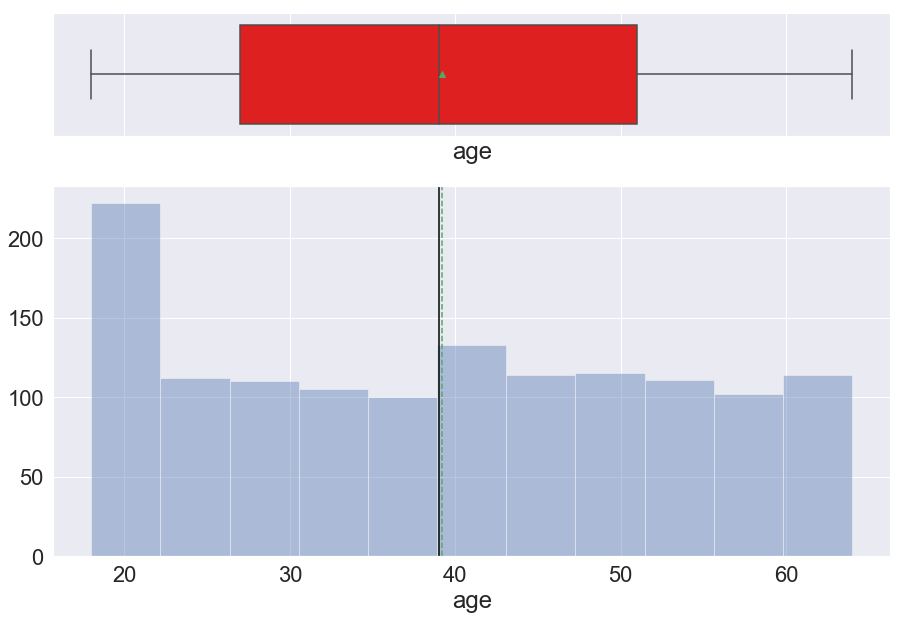

In [17]:
# Univariate Analysis
# Creating Histogram & Boxplot based on Age
histogram_boxplot(trellisdata['age'])

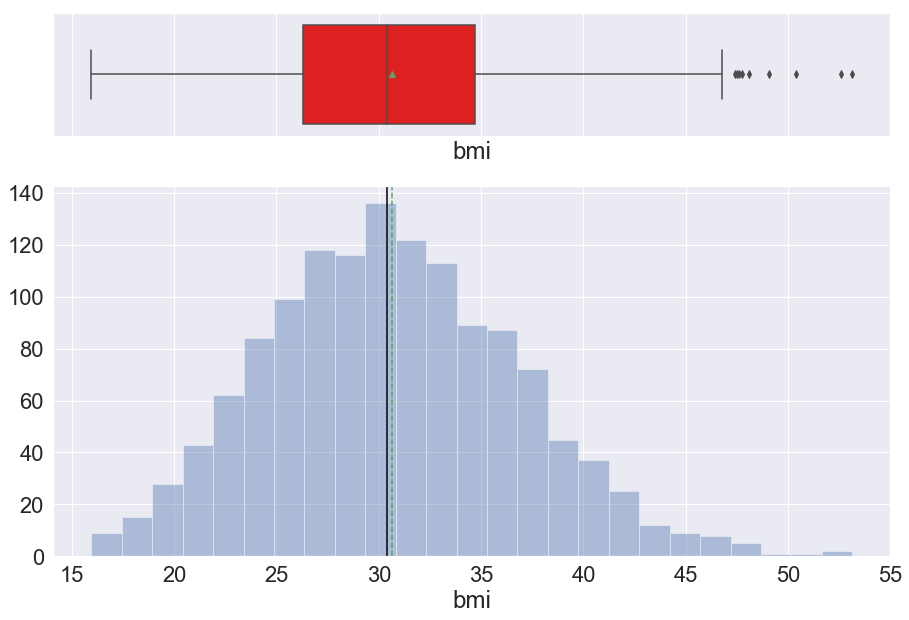

In [18]:
# Creating Histogram & Boxplot based on Age
histogram_boxplot(trellisdata['bmi'])

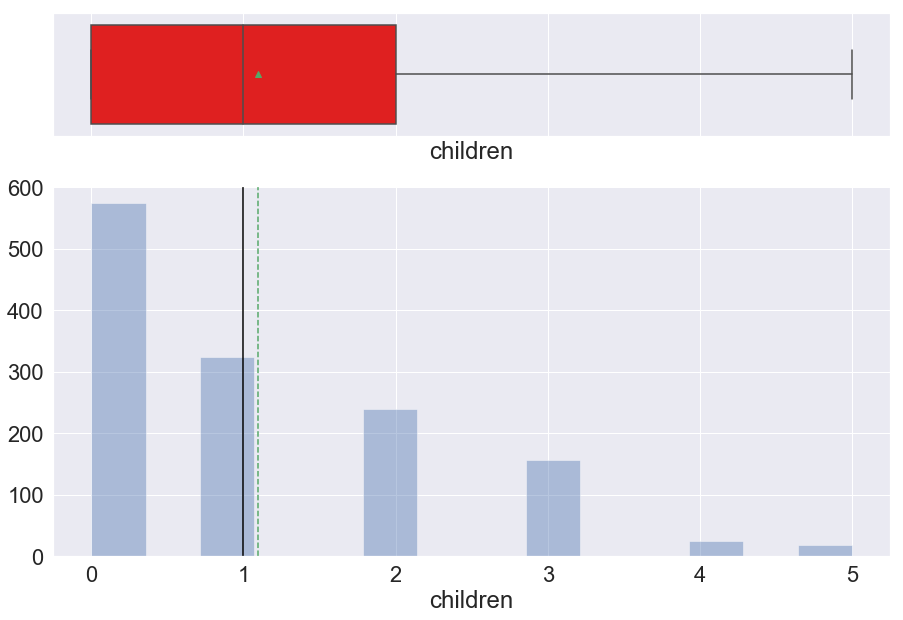

In [19]:
# Creating Histogram & Boxplot based on Age
histogram_boxplot(trellisdata['children'])

In [ ]:
# Observations
# Age seems uniformly distributed, with both MEAN and MEDIAN around 40.
# BMI Looks fairly normal distribution.
# Number of Children has left skewed distribution.
# The plot suggest we should convert Children to Categorical Variable for further analysis.

In [20]:
# Converting Children To Categorical Variable
trellisdata['children'] = trellisdata['children'].astype('category')

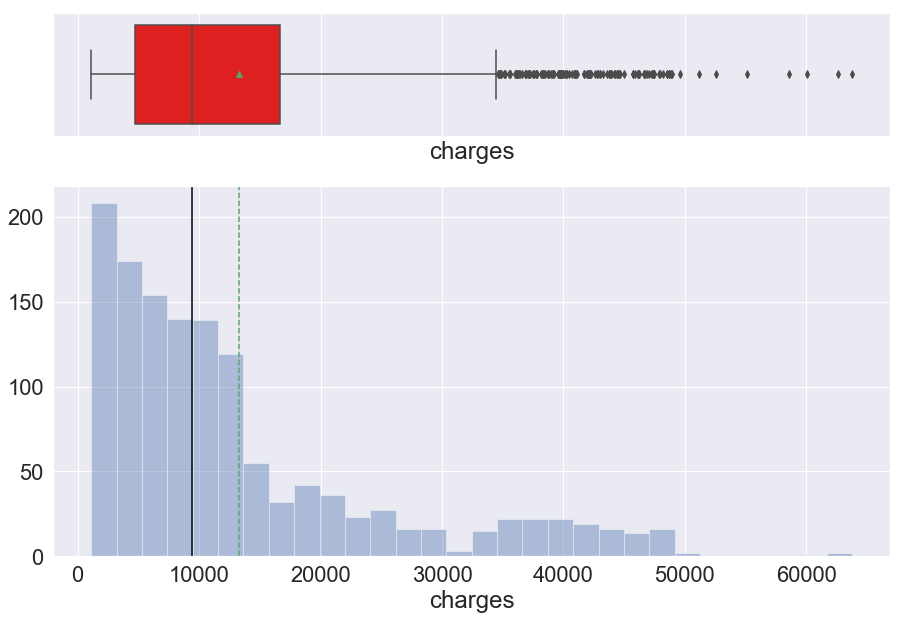

In [22]:
# Charges
histogram_boxplot(trellisdata["charges"])

In [ ]:
# Charges data are highly skewed, right side.
# Mean charges are higher MEDIAN.
# It's showing lots of Outliers towards higher end indicating that some people spend higher for their medicals.

In [23]:
## Univariate Analysis With Categorical Values
#
# Function To Create Barplots that indicate percentage for each category.
def bar_perc(plot,feature):
    '''
    plot feature : 1-d categorical feature array 
    '''
    total = len(feature) # Length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage,(x,y),size=12)    # annotate the percentage

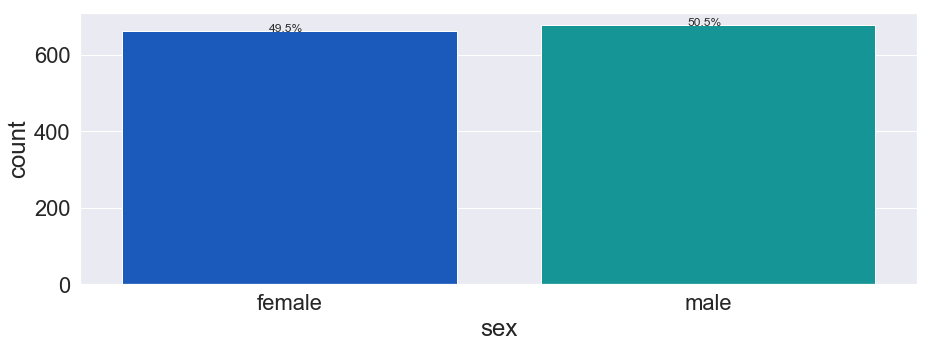

In [24]:
# SEX
plt.figure(figsize=(15,5))
ax = sns.countplot(trellisdata["sex"],palette="winter")
bar_perc(ax,trellisdata["sex"])

In [ ]:
# The distribution of observation across genders is fairly same as we saw earlier.

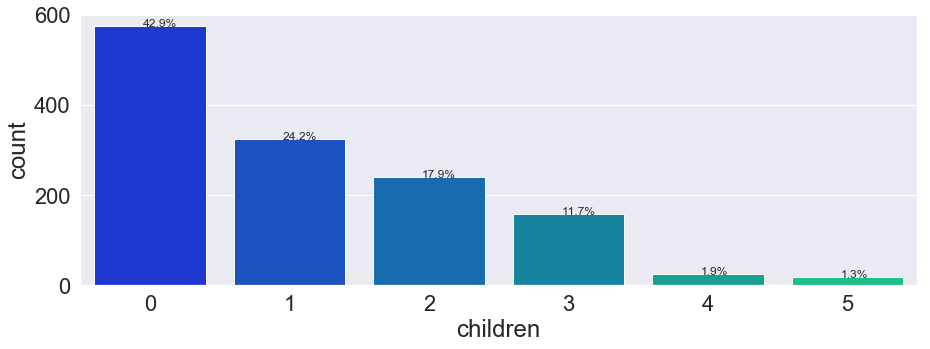

In [26]:
# Children
plt.figure(figsize=(15,5))
ax = sns.countplot(trellisdata["children"],palette="winter")
bar_perc(ax,trellisdata["children"])

In [ ]:
# Nearly 43% insured member do not have any kids.
# Nearly 24% insured members do have 1 kid.
# Nearly 18% have 2, 12% have 3 kids.

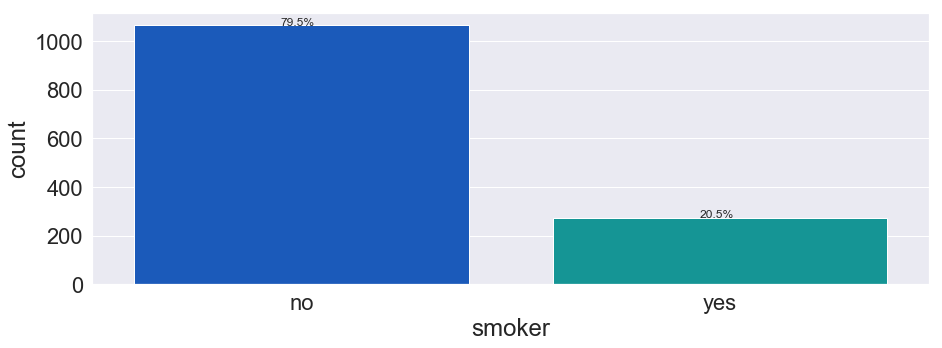

In [27]:
# SMOKER
plt.figure(figsize=(15,5))
ax = sns.countplot(trellisdata["smoker"],palette="winter")
bar_perc(ax,trellisdata["smoker"])

In [ ]:
# As mentioned earlier, nearly 80% insured members are Non-Smoker. 20% are smoker.
# Further analysis can be done to see how this 20% smoker affects the incurance claims.

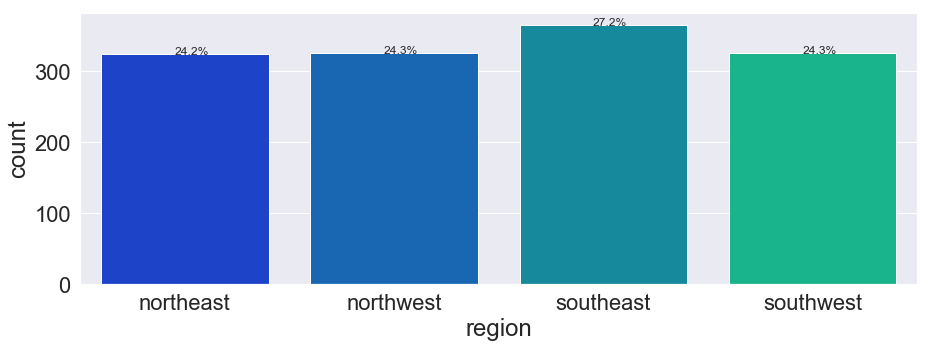

In [28]:
# REGION
plt.figure(figsize=(15,5))
ax = sns.countplot(trellisdata["region"],palette="winter")
bar_perc(ax,trellisdata["region"])

In [ ]:
# Southeast is favourite region, maximum insured member from this area - 27+%
# Other three region have 24.x% insured members.
# Overall fair distribution but nearly 3% difference with Southeast is statistically significant.

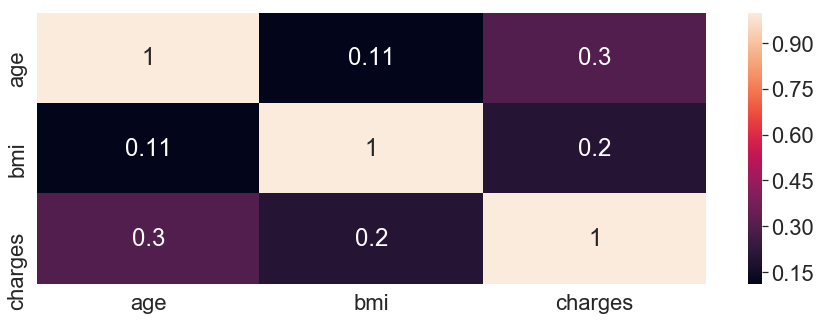

In [29]:
#BIVARIATE Analysis
plt.figure(figsize=(15,5))
sns.heatmap(trellisdata.corr(),annot=True)
plt.show()

In [ ]:
# Observation
# Correlation between all the variables is Positive but not so high that we can derive any impact.

<function matplotlib.pyplot.show(*args, **kw)>

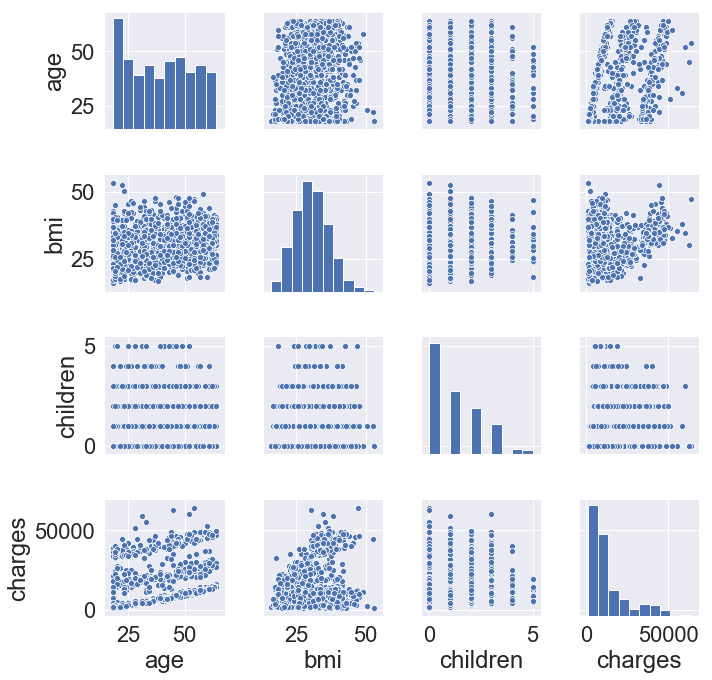

In [30]:
# Bivariate Distribution Of Every Possible Attribute Pair
sns.pairplot(trellisdata)
plt.show

In [ ]:
# There is an interesting pattern between age and charges.
# It is possible that for the same ailment, older people are charged more than the younger ones.

In [31]:
# Project's Statistics Question
# Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't.
trellisdata.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

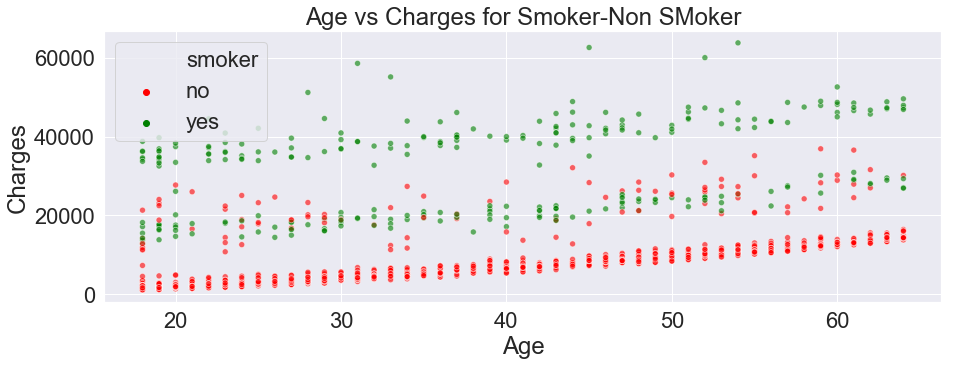

In [34]:
# Let's have Scatter Plot to study Smoker/Non-Smoker vs Medical Cost/Charges - Visual Evidence
# Across Different Ages
plt.figure(figsize=(15,5))
sns.scatterplot(trellisdata.age,trellisdata.charges,hue=trellisdata.smoker,palette=["red","green"],alpha=0.6)
plt.title("Age vs Charges for Smoker-Non SMoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


In [ ]:
# Visually the difference between charges of Smokers and Non-Smokers is appearent.
# The non-smokers have much lower medical bill claims compared to the smokers.
# We will have to perform Two sample T-Test (independent) to test to check if the mean charges of smokers 
# is significantly greater than the non-smokers.

In [ ]:
# T-Test to check dependancy of Charges on Smoking Attribute
# Null Hypothesis = Ho = MEAN (Average) Charges of Smokers is Less Than or Equal To Non-Smokers
# Alternate Hypothesis = Ha = MEAN (Average) Charges of Smokers is Greater than Non-Smokers
#
Significance Level = 0.05

In [38]:
Ho = "MEAN (Average) Charges of Smokers is Less Than or Equal To Non-Smokers"
Ha = "MEAN (Average) Charges of Smokers is Greater than Non-Smokers"
# Selecting Charges Corresponding To Smokers As An Array
x = np.array(trellisdata[trellisdata.smoker == "yes"].charges)
# Selecting Charges Corresponding To Non-Smokers As An Array
y = np.array(trellisdata[trellisdata.smoker == "no"].charges)
# Performing Individual T Test
t, p_value = stats.ttest_ind(x,y)
print(t,p_value)
# Since it is One Tailed Test
print("Tstat :",t,"P_Value :",p_value/2)

46.664921172723716 8.271435842177219e-283
Tstat : 46.664921172723716 P_Value : 4.1357179210886093e-283
